In [1]:
from utils import config
import numpy as np
import matplotlib.pyplot as plt

# loading tif images
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly

In [2]:
sentinel2_image = f"{config.SENTINEL2_IMAGE_DIR}/resolution-10m/puszcza-karpacka-2022-06-small-resolution10m.tif"
inDataset = gdal.Open(sentinel2_image, GA_ReadOnly)

In [3]:
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize
rows, cols

(2894, 3807)

In [4]:
x0 = 0
y0 = 0

G_shape = (rows, cols-x0,) + config.RGB_CHANNELS

G = np.zeros(G_shape)

rgb_channels = config.RGB_CHANNELS[0]

for b in range(rgb_channels):
    band = inDataset.GetRasterBand(rgb_channels-b)
    tmp = (band.ReadAsArray(x0,y0,cols-x0,rows-y0)/3000)*255.
    G[:,:,b] = np.where(tmp>255,255,tmp)

In [5]:
G.shape

(2894, 3807, 3)

(-0.5, 3806.5, 2893.5, -0.5)

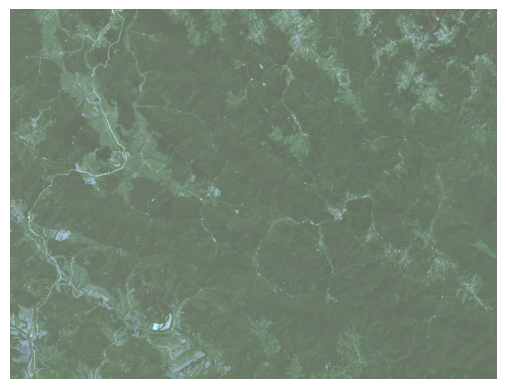

In [6]:
plt.imshow(G/255.)
plt.axis("off")

In [7]:
with open("./results/full-small-2022.npy", 'wb') as file:
    np.save(file, G)